# GloVe: Word Representation

- **Author** : Seyed Rasul Mortazavi Moghadam
- **Contact** : s.rasul.mortazavi@gmail.com

![GloVe](GloVe.jpg)

## What is GloVe?
**GloVe** (**Glo**bal **Ve**ctors for word representation), is a model for creating word embeddings that encodes both the **meaning of words** and their **relationships** with other words in the same vector space. The core idea behind GloVe is that the **co-occurrence** of words in a text can provide valuable information about their meanings. If two words frequently appear together (e.g., "king" and "queen"), then their meanings should be closely related. GloVe uses this co-occurrence information to generate vector representations of words that reflect these relationships.

GloVe encode the co-occurrence probability ratio between two words as vector differences. GloVe uses a weighted least squares objective 
 that minimizes the difference between the dot product of the vectors of two words and the logarithm of their number of co-occurrences:

**$$J=\sum_{i, j=1}^{V}f\left(𝑋_{i j}\right)(w^{T}_{i}\tilde{w}_{j} + b_{i} + \tilde{b}_{j} - \log{𝑋}_{ij})^{2}$$**

where $w_{i}$ and $b_{i}$ are the word vector and bias respectively of word ${i}$, $w^{T}_{i}$ and ${b}_{j}$ are the context word vector and bias respectively of word ${j}$, ${𝑋}_{ij}$ is the number of times word ${i}$ occurs in the context of word ${j}$ (the values present in the Co-occurrence matrix), and $f$ is a weighting function to reduce the impact of very frequent word pairs, such as stop words (e.g., "the," "and"). It assigns lower weights to very frequent co-occurrences. The weighting function $f(x)$ is designed to reduce the influence of very high $x$ values, while still preserving important co-occurrence information.

The weighting function is typically defined as:
**$$f(x) = \begin{cases} (\dfrac{x}{x_{max}})^\alpha & \quad \text{${x} < x_{max}$}\\ 
1 & \quad \text{otherwise}
\end{cases}$$**

where $\alpha$ is a tuning parameter and $x_{max}$ is a threshold.

**Example:**
For very frequent words like "the" or "on," even if they co-occur often, their influence on the vector training is reduced.

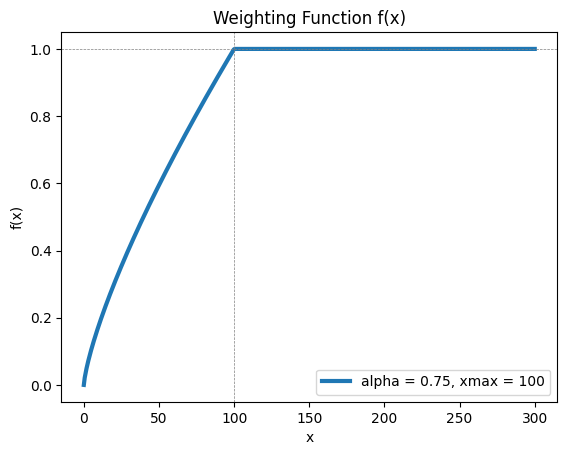

In [13]:
# @hidden_cell
import numpy as np
import matplotlib.pyplot as plt

xmax = 100
alpha = 3/4
x = np.linspace(0, 300, 500)
y = np.where(x < xmax, (x / xmax)**alpha, 1)

plt.plot(x, y, label=f'alpha = {alpha}, xmax = {xmax}' , linewidth=3)
plt.axhline(1, linestyle='--', color='gray', linewidth=0.5) # horizontal lines
plt.axvline(100, linestyle='--', color='gray', linewidth=0.5) # vertical lines
plt.title('Weighting Function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

## Why Do We Need GloVe?
Computers can't directly understand words or text. They require numerical representations to process them. Early methods like **Bag of Words** and **TF-IDF** (Term Frequency-Inverse Document Frequency) were used to represent text as vectors, but they had significant limitations:

- They didn’t capture the meaning of words effectively.
- Words with similar meanings were represented very differently.
- There was no understanding of relationships between words, such as "cat" and "kitten."

To overcome these limitations, new methods like **Word2Vec** and **GloVe** were introduced to generate word embeddings, where each word is represented as a vector in a way that captures semantic relationships.

## How Does GloVe Work?

### 1: Building a Co-occurrence Matrix:
GloVe starts by analyzing a large text corpus and creating a co-occurrence matrix. This matrix counts how frequently each word appears in the context of other words. The size of the context window (e.g., 5 words before and after) is defined.

**Example:**
Consider the following sentences:

- "The cat sits on the mat."
- "The dog lies on the mat."

We build a co-occurrence matrix where each cell *$𝑋_{i j}$* represents how often word *$j$* appears in the context of word *$i$*.
**co-occurrence matrix:**
<center>

|       | the | cat | sits | on  | mat | dog | lies |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **the**  |  0  |  2  |  1   |  2  |  2  |  1  |  1   |
| **cat**  |  2  |  0  |  1   |  1  |  1  |  0  |  0   |
| **sits** |  1  |  1  |  0   |  1  |  1  |  0  |  0   |
| **on**   |  2  |  1  |  1   |  0  |  2  |  1  |  1   |
| **mat**  |  2  |  1  |  1   |  2  |  0  |  1  |  1   |
| **dog**  |  1  |  0  |  0   |  1  |  1  |  0  |  1   |
| **lies** |  1  |  0  |  0   |  1  |  1  |  1  |  0   |

</center>

In this matrix, for instance, "cat" appears in the context of "the" 2 times, and "on" appears with "the" 2 times, and so on.

After the values are weighted based on the proximity or distance of the words from each other. This is an example representation; the actual weights would depend on how you define and calculate them based on your specific application (e.g., distance in terms of number of words, etc.).

**Weighted Co-occurrence Matrix:**

<center>

|       | the | cat | sits | on  | mat | dog | lies |
|-------|-----|-----|------|-----|-----|-----|------|
| **the**  |  0  |  1.5|  1   |  2  |  1.5|  1  |  1   |
| **cat**  |  1.5|  0  |  1   |  1  |  1  |  0  |  0   |
| **sits** |  1  |  1  |  0   |  1  |  1  |  0  |  0   |
| **on**   |  2  |  1  |  1   |  0  |  2  |  1  |  1   |
| **mat**  |  1.5|  1  |  1   |  2  |  0  |  1  |  1   |
| **dog**  |  1  |  0  |  0   |  1  |  1  |  0  |  1   |
| **lies** |  1  |  0  |  0   |  1  |  1  |  1  |  0   |

</center>


### 2: Capturing Relationships Between Words:
The co-occurrence matrix captures how words are related. For example, "apple" and "fruit" might appear together frequently, so the matrix would reflect that connection. Conversely, "apple" and "car" might not appear together often, so their relationship is weaker.

### 3: Learning Word Vectors:
GloVe uses the co-occurrence information to train word vectors. The idea is that two words that often appear together should have similar embeddings. The model tries to optimize the vectors so that the dot product of two word vectors reflects how often those words co-occur.

### 4: Optimization with a Loss Function:
GloVe minimizes a loss function that measures how well the word embeddings predict the word co-occurrence information. The goal is to make sure that word vectors capture the relationships between words by preserving the global co-occurrence patterns. This process is done iteratively, adjusting the vectors after each iteration until it reaches a satisfactory solution.

### 5: Word Vectors as Final Output:
After training, GloVe produces word embeddings: vectors that represent each word. These vectors can then be used for various NLP tasks, such as text classification, sentiment analysis, and machine translation.

## Practice with code

To feed the GloVe algorithm, here we use Telegram, we scrapes posts of a public channel using Telegram web preview.(in this example, we scrape Telegram's own notification channel).

**Limitations**:
- **Pagination and More Posts**: This code only scrapes posts on the current page whitout pagination.

- **Multimedia Posts**: This code only extracts text content of the posts(not images, videos, ...)

- **Telegram Restrictions**: If the channel is private or requires login, this method won't work, since it only scrapes public content available on the web.


### Get posts from Telegram:

- **Fetching the Web Page**:

    We first make a request to the web version of the Telegram channel to get the HTML content of the page.
- **Parsing the Page**:

    The HTML content is then parsed using BeautifulSoup, allowing us to navigate through the HTML tree structure and locate the relevant elements (i.e., the posts).
- **Extracting the Post Content**:

    All the posts are contained within < div > elements that share a specific class (tgme_widget_message_text). We extract all of these elements and loop through them to print the post content.

Make sure that your internet connection is established and your IP address is not from Iran.
You can install required libraries using using the command below if you don't have them already:

In [ ]:
pip install requests beautifulsoup4

In [ ]:
# Importing Required Libraries:

# requests: This is a Python library used for sending HTTP requests. We use it to fetch the HTML content of the Telegram web preview.
# BeautifulSoup: from the bs4 module: This is used for parsing the HTML content and extracting the relevant information (in this case, the posts).

import requests
from bs4 import BeautifulSoup


# URL of the Public Channel:
# The URL points to the Telegram channel's web preview page, where posts are visible to users who don't have the app.
# URL of the Telegram channel preview page (https://t.me/s/CHANNLE_NAME)
channel_url = 'https://t.me/s/telegram'


# a GET request to fetch the channel page
response = requests.get(channel_url)

# check we get a successful response
response.raise_for_status()  

# Parsing the HTML Content of the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'lxml')

# Finding All the Posts
# We need to locate all the HTML elements that contain the post content.
#  On the Telegram web preview, post texts are typically contained within <div> elements that have the class tgme_widget_message_text.
#  We use soup.find_all() to find all these <div> elements.
def get_posts(soup):
    posts = []
    
    # Find all the divs containing the posts
    posts_text = soup.find_all('div', class_='tgme_widget_message_text')
    for post_text in posts_text:

        # Check the post contains text
        if post_text:
            post_content = post_text.get_text(separator="\n").strip()
            posts.append(post_content)
    
    posts.reverse()
    return posts


posts = get_posts(soup)

#Corpus using in the next step
corpus = []

#Split each post by space into an array
for idx, post in enumerate(posts, 1):
    corpus.append(post.split())
    
print(*corpus, sep='\n')

We have prepared the corpus up to this stage, now let's go to the implementation of the glove algorithm.

### 1. Import Required Libraries:
- **numpy**: Used for numerical operations like matrix and vector calculations.

- **collections.Counter**: A specialized dictionary for counting occurrences of elements.

- **collections.defaultdict**: A dictionary that provides a default value for non-existing keys.

- **tqdm**: A library to show a progress bar during iteration (useful during training).

- **itertools**: Helps in working with iterators for efficient looping.

- **matplotlib.pyplot**: This library is used for plotting graphs in Python.


In [ ]:
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt


**To install required libraries:**

In [ ]:
pip install numpy collections tqdm itertools matplotlib

### 2. Step 1: Prepare Data and Build the Co-occurrence Matrix

The first step in GloVe is to create a **co-occurrence matrix**, which captures how often words appear together within a given window size in the corpus.

- **Input**: The corpus (list of tokenized sentences) and window_size (window_size=5 means we consider the 5 words before and after the target word as its context).

- **Vocabulary**: We extract all unique words from the corpus and assign each word a unique ID (word_to_id).

- **Co-occurrence Matrix**: For each word in a sentence, we count how often other words appear within its context window. The weight of the context word is inversely proportional to the distance from the target word.

In [ ]:

# Step1: prepare data and build co-occurrence matrix
def build_cooccurrence_matrix(corpus, window_size=5):
    vocab = set(itertools.chain(*corpus))
    word_to_id = {word: i for i, word in enumerate(vocab)}
    id_to_word = {i: word for word, i in word_to_id.items()}
    
    cooccurrence_matrix = defaultdict(Counter)

    for sentence in corpus:
        for i, word in enumerate(sentence):
            word_id = word_to_id[word]
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            
            for j in range(start, end):
                if i != j:
                    context_word = sentence[j]
                    context_word_id = word_to_id[context_word]
                    cooccurrence_matrix[word_id][context_word_id] += 1 / abs(j - i)  # weighted by distance

    return cooccurrence_matrix, word_to_id, id_to_word


### 3. GloVe Loss Function

This function computes the loss for each word pair in the GloVe model.
- **wi** and **wj**: The embedding vectors for the word and its context word.
- **bi** and **bj**: The biases for the word and its context word.
- **Xij**: The co-occurrence count between the word and context word.
- **X_max** and **alpha**: Hyperparameters used to weight the co-occurrence counts.

The loss function minimizes the difference between the dot product of the word and context embeddings and the logarithm of the co-occurrence count, adjusted by a weighting function.

In [ ]:

# GloVe loss function
def glove_loss(wi, wj, bi, bj, Xij, X_max, alpha):
    weighting = (Xij / X_max)**alpha if Xij < X_max else 1
    loss = weighting * (wi.dot(wj) + bi + bj - np.log(Xij))**2
    return loss


### 4. Training the GloVe Model

This function optimizes the word and context embeddings using gradient descent.

- **Parameters**:

    - **embedding_dim**: The dimension of the word embeddings.
    - **iterations**: The number of training epochs.
    - **learning_rate**: The step size for the gradient descent.
    - **X_max** and **alpha**: Control how much weight each co-occurrence count receives.

- **Initialization**:

    - Word and context embeddings (W, W_context) are initialized randomly.
    - Bias terms (biases, biases_context) are initialized to zeros.

- **Training Loop**:

    - For each epoch, the algorithm iterates over each word-context pair in the co-occurrence matrix.
    - Loss is calculated using the "glove_loss" function, and **gradients** are computed for each parameter.
    - Parameters (W, W_context, biases, and biases_context) are updated using gradient descent.
    - Progress is tracked using "tqdm", and total loss is printed after each epoch.

In [ ]:

# Optimize parameters
def train_glove(cooccurrence_matrix, word_to_id, embedding_dim=50, iterations=100, learning_rate=0.05, X_max=100, alpha=0.75):
    vocab_size = len(word_to_id)
    
    # GloVe Model parameters
    W = np.random.randn(vocab_size, embedding_dim) / np.sqrt(vocab_size)
    W_context = np.random.randn(vocab_size, embedding_dim) / np.sqrt(vocab_size)
    biases = np.zeros(vocab_size)
    biases_context = np.zeros(vocab_size)
    
    loss_list = []
    # Training
    for epoch in range(iterations):
        total_loss = 0
        for word_id, context in tqdm(cooccurrence_matrix.items(), desc=f'Epoch {epoch+1}'):
            for context_word_id, Xij in context.items():
                # main word and context word
                wi = W[word_id]
                wj = W_context[context_word_id]
                bi = biases[word_id]
                bj = biases_context[context_word_id]
                
                # Calculate loss 
                loss = glove_loss(wi, wj, bi, bj, Xij, X_max, alpha)
                total_loss += loss
                
                # Gradient descent for each parameter
                weighting = (Xij / X_max)**alpha if Xij < X_max else 1
                grad_wi = weighting * (wi.dot(wj) + bi + bj - np.log(Xij)) * wj
                grad_wj = weighting * (wi.dot(wj) + bi + bj - np.log(Xij)) * wi
                grad_bi = weighting * (wi.dot(wj) + bi + bj - np.log(Xij))
                grad_bj = weighting * (wi.dot(wj) + bi + bj - np.log(Xij))
                
                # Update parameters
                W[word_id] -= learning_rate * grad_wi
                W_context[context_word_id] -= learning_rate * grad_wj
                biases[word_id] -= learning_rate * grad_bi
                biases_context[context_word_id] -= learning_rate * grad_bj

        loss_list.append(total_loss)
    
    return W, W_context, loss_list



In [ ]:

# Building the Co-occurrence Matrix
cooccurrence_matrix, word_to_id, id_to_word = build_cooccurrence_matrix(corpus)

embedding_dim = 50   # Length of each word vector
iterations = 100  # Number of epochs

# The GloVe model is trained for 100 iterations with a vector dimension of 50.
W, W_context, loss_list = train_glove(cooccurrence_matrix, word_to_id, embedding_dim, iterations)



# Plot Chart of loss by epoches
plt.plot( loss_list, label=f'Vocabulary size: {len(word_to_id)}' , linewidth=2, color='red')
plt.title('Loss by epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


word = 'Telegram'
word_id = word_to_id[word]
word_vector = W[word_id]

# Show vector of an example word : "telegram"
print(f"Vector of "'{word}'" word:\n{word_vector}, word_id:{word_id}")

# Plot the word vector as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(word_vector)), word_vector)
plt.title(f'Word Vector for "{word}"')
plt.xlabel('Vector Component Index')
plt.ylabel('Value')
plt.show()

## All code sections in one:

['For', 'more', 'details', 'on', 'all', 'the', 'features', 'from', 'this', 'update,', 'check', 'out', 'our', 'latest', 'blog:', 'https://telegram.org/blog/gifts-verification-platform', 'October', 'Features', '1', '•', '2', '•', '3', '•', '4', '•', 'More']
['RTMP', 'Streams', 'on', 'Android.', 'Telegram', 'for', 'Android', 'now', 'supports', 'livestreaming', 'with', 'RTMP', '.', 'This', 'allows', 'users', 'to', 'generate', 'a', 'stream', 'key', 'and', 'connect', 'the', 'video', 'feed', 'to', 'popular', 'apps', '.', 'October', 'Features', '1', '•', '2', '•', '3', '•', '4', '•', 'More']
['Improved', 'Reporting', 'Interface.', 'The', 'reporting', 'menu', 'has', 'been', 'expanded', 'with', 'detailed', 'options', 'for', 'each', 'category.', 'The', 'list', 'of', 'reporting', 'reasons', 'can', 'now', 'update', 'dynamically', '–', 'further', 'improving', 'reports', 'for', 'moderators', 'and', 'helping', 'scale', "Telegram's", 'AI', 'moderation', 'tools', '.', 'October', 'Features', '1', '•', '2

Epoch 100: 100%|██████████| 378/378 [00:01<00:00, 334.72it/s]


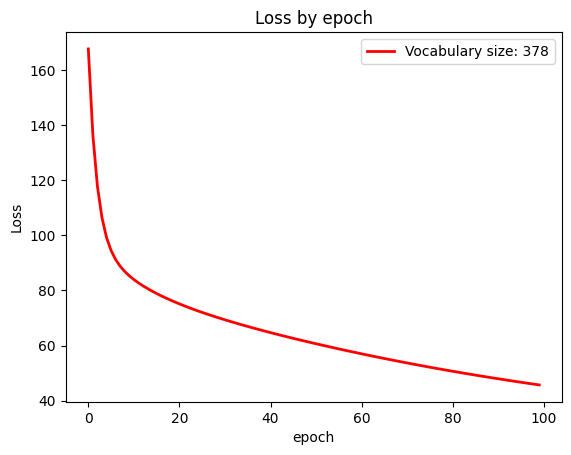

Vector of "'Telegram'" word:
[ 1.55561541e-01  1.77020706e-01 -5.40811034e-03  3.59769057e-03
 -8.16132010e-03 -4.15956336e-02 -1.79394031e-02 -1.44513644e-01
  1.56769822e-01 -5.83205062e-05  1.55230251e-01  1.15323020e-02
  1.20502608e-01 -2.04556712e-01 -1.29421676e-01  3.21621670e-02
 -1.63679719e-01 -1.14871509e-01  8.62045380e-02 -5.56635456e-02
 -1.67371505e-01 -5.28203969e-02 -9.17762628e-02  1.08312141e-01
 -5.51253747e-02  1.67345727e-01  1.61171293e-01 -6.27636788e-03
  1.39057885e-01  1.83056904e-01  2.28870038e-01 -1.28071171e-01
 -1.26117661e-01  4.29829807e-02 -2.03594756e-01 -1.60113889e-01
 -2.32977882e-02  1.37207303e-02 -2.25264920e-01  2.30003619e-01
  1.33797845e-01 -6.34702484e-02 -1.32517611e-01  5.88101981e-02
  2.36643770e-01  1.24257856e-01 -3.05104777e-01 -2.45094159e-02
  3.45571410e-02 -4.56085027e-02], word_id:176


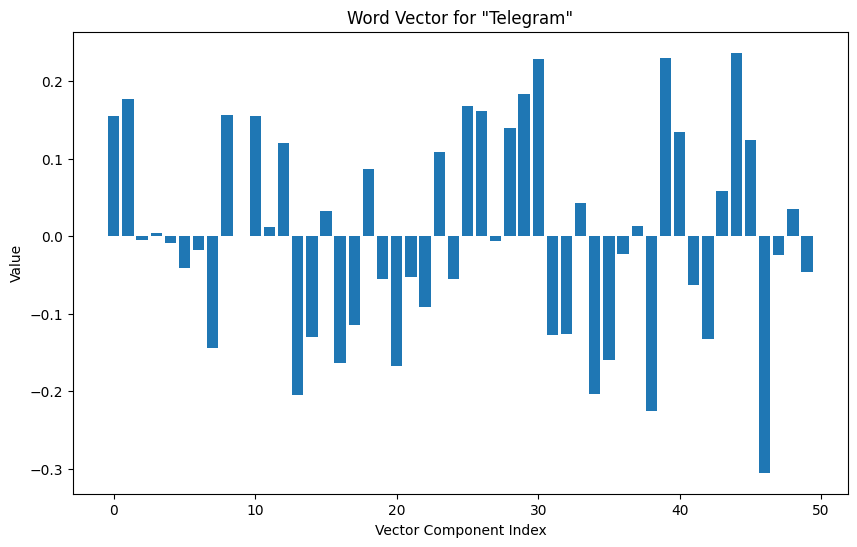

In [26]:
import requests
from bs4 import BeautifulSoup
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

# URL of the Telegram channel preview page (https://t.me/s/CHANNLE_NAME)
channel_url = 'https://t.me/s/telegram'


# a GET request to fetch the channel page
response = requests.get(channel_url)

# check we get a successful response
response.raise_for_status()  

# Parsing the HTML Content of the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'lxml')

# Finding All the Posts
def get_posts(soup):
    posts = []
    
    # Find all the divs containing the posts
    posts_text = soup.find_all('div', class_='tgme_widget_message_text')
    for post_text in posts_text:

        # Check the post contains text
        if post_text:
            post_content = post_text.get_text(separator="\n").strip()
            posts.append(post_content)
    
    posts.reverse()
    return posts


posts = get_posts(soup)

#Corpus using in the next step
corpus = []

#Split each post by space into an array
for idx, post in enumerate(posts, 1):
    corpus.append(post.split())
    
print(*corpus, sep='\n')

# Step1: prepare data and build co-occurrence matrix
def build_cooccurrence_matrix(corpus, window_size=5):
    vocab = set(itertools.chain(*corpus))
    word_to_id = {word: i for i, word in enumerate(vocab)}
    id_to_word = {i: word for word, i in word_to_id.items()}
    
    cooccurrence_matrix = defaultdict(Counter)

    for sentence in corpus:
        for i, word in enumerate(sentence):
            word_id = word_to_id[word]
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            
            for j in range(start, end):
                if i != j:
                    context_word = sentence[j]
                    context_word_id = word_to_id[context_word]
                    cooccurrence_matrix[word_id][context_word_id] += 1 / abs(j - i)  # weighted by distance

    return cooccurrence_matrix, word_to_id, id_to_word


# GloVe loss function
def glove_loss(wi, wj, bi, bj, Xij, X_max, alpha):
    weighting = (Xij / X_max)**alpha if Xij < X_max else 1
    loss = weighting * (wi.dot(wj) + bi + bj - np.log(Xij))**2
    return loss



# Optimize parameters
def train_glove(cooccurrence_matrix, word_to_id, embedding_dim=50, iterations=100, learning_rate=0.05, X_max=100, alpha=0.75):
    vocab_size = len(word_to_id)
    
    # GloVe Model parameters
    W = np.random.randn(vocab_size, embedding_dim) / np.sqrt(vocab_size)
    W_context = np.random.randn(vocab_size, embedding_dim) / np.sqrt(vocab_size)
    biases = np.zeros(vocab_size)
    biases_context = np.zeros(vocab_size)
    
    loss_list = []
    # Training
    for epoch in range(iterations):
        total_loss = 0
        for word_id, context in tqdm(cooccurrence_matrix.items(), desc=f'Epoch {epoch+1}'):
            for context_word_id, Xij in context.items():
                # main word and context word
                wi = W[word_id]
                wj = W_context[context_word_id]
                bi = biases[word_id]
                bj = biases_context[context_word_id]
                
                # Calculate loss 
                loss = glove_loss(wi, wj, bi, bj, Xij, X_max, alpha)
                total_loss += loss
                
                # Gradient descent for each parameter
                weighting = (Xij / X_max)**alpha if Xij < X_max else 1
                grad_wi = weighting * (wi.dot(wj) + bi + bj - np.log(Xij)) * wj
                grad_wj = weighting * (wi.dot(wj) + bi + bj - np.log(Xij)) * wi
                grad_bi = weighting * (wi.dot(wj) + bi + bj - np.log(Xij))
                grad_bj = weighting * (wi.dot(wj) + bi + bj - np.log(Xij))
                
                # Update parameters
                W[word_id] -= learning_rate * grad_wi
                W_context[context_word_id] -= learning_rate * grad_wj
                biases[word_id] -= learning_rate * grad_bi
                biases_context[context_word_id] -= learning_rate * grad_bj

        loss_list.append(total_loss)
    
    return W, W_context, loss_list


# Building the Co-occurrence Matrix
cooccurrence_matrix, word_to_id, id_to_word = build_cooccurrence_matrix(corpus)

embedding_dim = 50   # Length of each word vector
iterations = 100  # Number of epochs

# The GloVe model is trained for 100 iterations with a vector dimension of 50.
W, W_context, loss_list = train_glove(cooccurrence_matrix, word_to_id, embedding_dim, iterations)



# Plot Chart of loss by epoches
plt.plot( loss_list, label=f'Vocabulary size: {len(word_to_id)}' , linewidth=2, color='red')
plt.title('Loss by epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


word = 'Telegram'
word_id = word_to_id[word]
word_vector = W[word_id]

# Show vector of an example word : "telegram"
print(f"Vector of \"'{word}'\" word :\n{word_vector}, word_id:{word_id}")

# Plot the word vector as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(word_vector)), word_vector)
plt.title(f'Word Vector for "{word}"')
plt.xlabel('Vector Component Index')
plt.ylabel('Value')
plt.show()

## Why GloVe is Effective ?
- **Global Information**: GloVe leverages the **global co-occurrence statistics** of the entire corpus, meaning it takes into account all the word pairs and their relationships across the whole text.

- **Semantic Vectors**: The resulting word embeddings capture semantic relationships, meaning that words like "king" and "queen" will have similar vector representations because of their similar usage contexts.

- **Linear Relationships**: One of GloVe’s key features is its ability to represent linear relationships between words. For example, it captures analogies like:
vector("king") - vector("man") + vector("woman") ≈ vector("queen") This means that GloVe can model relationships between words in a way that reflects their real-world meanings.

- **Efficient Representation**: Words with similar meanings or usage patterns will have similar vectors, which is useful for downstream NLP tasks.

## Applications for GloVe:

- **Text Analysis**: Used in NLP tasks to capture word meanings and relationships for tasks like sentiment analysis or text classification.

- **Recommendation Systems**: Helps find relationships between words or items for smarter recommendations.

- **Machine Translation**: Improves machine translation systems by providing better word representations based on their meaning.

## Difference Between GloVe and Word2Vec:

- **GloVe** focuses on the global co-occurrence of words in a corpus and uses a matrix to capture these relationships. **Word2Vec**, on the other hand, is based on local context windows around words and predicts word occurrences based on nearby words.

- GloVe generally excels at learning more **general semantic relationships** between words, whereas Word2Vec focuses more on **predictive** word modeling.

## Conclusion:

**GloVe** is a powerful word embedding model that learns to represent words as vectors by analyzing how often they co-occur with other words in a corpus. These embeddings capture both the meaning and relationships between words, making **GloVe** extremely useful in various NLP tasks. Its ability to encode semantic relationships, including analogies, makes it one of the leading methods for generating word embeddings, alongside Word2Vec.

## Refrences:
1: [Pennington, Jeffrey, Richard Socher, and Christopher D. Manning. “Glove: Global Vectors for Word Representation.”](https://aclanthology.org/D14-1162.pdf)

2: [Stanford NLP GloVe Project](https://nlp.stanford.edu/projects/glove/)

3: [An Introduction to the Global Vectors (GloVe) Algorithm](https://wandb.ai/authors/embeddings-2/reports/An-Introduction-to-the-Global-Vectors-GloVe-Algorithm--VmlldzozNDg2NTQ)

4: [GloVe in NLP](https://www.scaler.com/topics/nlp/glove-embeddings/)

5: [Making sense of word2vec](https://rare-technologies.com/making-sense-of-word2vec/)